# Online Retail K-means & Hierarchical Clustering
---
## About Dataset


<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/ninja.jpg?raw=True" alt="Drawing" style="width: 300px;"/>

**Context**

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells 

unique all-occasion gifts. Many customers of the company are wholesalers.

**Business Goal**

We will be using the online retail trasnational dataset to build a RFM clustering and choose the best set of customers which the company should target.

**Link to dataset:** https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering

# Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")

In [2]:
#Read data
df = pd.read_csv('D:\DataSet\OnlineRetail.csv' , encoding= 'unicode_escape')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       01-12-2010 08:26       2.55     17850.0  United Kingdom  
1       01-12-2010 08:26       3.39     17850.0  United Kingdom  
2       01-12-2010 08:26       2.75     17850.0  United Kingdom  
3       01-12-2010 08:26       3.39     17850.0  United Kingdom  
4       01-12-2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
541904  09-12-2011 12:50       0.85     12680.0          France  
541905  09-12-2011 12:50       2.10     12680.0          France  
541906  09-12-2011 12:50       4.15     12680.0          France  
541907  09-12-2011 12:50       4.15     12680.0          France  
541908  09-12-2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

# Data Cleaning
---

In [3]:
#Normalize column names
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [4]:
#Check duplicates
##Show duplicated rows
df[df.duplicated(keep = False)]

invoiceno stockcode                       description  quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

             invoicedate  unitprice  customerid         country  
485     01-12-2010 11:45       4.95     17908.0  United Kingdom  
489     01-12-2010 11:45       2.10     17908.0  United Kingdom  
494     01-12-2010 11:45       1.25     17908.0  United Kingdom  
517     01-12-2010 11:45       1.25     17908.0  United Kingdom  
521     01-12-2010 11:45       2.95     17908.0  United Kingdom  
...                  ...        ...         ...             ...  
541675  09-12-2011 11:34       0.39     14446.0  United Kingdom  
541689  09-12-2011 11:34       2.49     14446.0  United Kingdom  
541692  09-12-2011 11:34       1.95     14446.0  United Kingdom  
541699  09-12-2011 11:34       2.10     14446.0  United Kingdom  
541701  09-12-2011 11:34       2.08     14446.0  United Kingdom  

[10147 rows x 8 columns]

In [5]:
#Drop duplicates
df.drop_duplicates(inplace = True)

In [6]:
#Check percentage of missing values
df.isna().mean()*100

invoiceno       0.000000
stockcode       0.000000
description     0.270945
quantity        0.000000
invoicedate     0.000000
unitprice       0.000000
customerid     25.163377
country         0.000000
dtype: float64

In [7]:
df[df['customerid'].isna()]

invoiceno stockcode                      description  quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

             invoicedate  unitprice  customerid         country  
622     01-12-2010 11:52       0.00         NaN  United Kingdom  
1443    01-12-2010 14:32       2.51         NaN  United Kingdom  
1444    01-12-2010 14:32       2.51         NaN  United Kingdom  
1445    01-12-2010 14:32       0.85         NaN  United Kingdom  
1446    01-12-2010 14:32       1.66         NaN  United Kingdom  
...                  ...        ...         ...             ...  
541536  09-12-2011 10:26       4.13         NaN  United Kingdom  
541537  09-12-2011 10:26       4.13         NaN  United Kingdom  
541538  09-12-2011 10:26       4.96         NaN  United Kingdom  
541539  09-12-2011 10:26      10.79         NaN  United Kingdom  
541540  09-12-2011 10:26    1714.17         NaN  United Kingdom  

[135037 rows x 8 columns]

In [8]:
df[df['invoiceno'] == '536544']

invoiceno stockcode                      description  quantity  \
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   
1447    536544     21790               VINTAGE SNAP CARDS         9   
...        ...       ...                              ...       ...   
1965    536544     21721        CANDY SHOP  STICKER SHEET         1   
1966    536544     21722      SWEET PUDDING STICKER SHEET         1   
1967    536544     21731    RED TOADSTOOL LED NIGHT LIGHT         5   
1968    536544     21742      LARGE ROUND WICKER PLATTER          1   
1969    536544     21758             VINTAGE SHELLS PRINT         1   

           invoicedate  unitprice  customerid         country  
1443  01-12-2010 14:32       2.51         NaN  United Kingdom  
1444  01-12-2010 14:32       2.51         NaN  United Kingdom  
1445  01-12-2010 14:32       0.85         NaN  United Kingdom  
1446  01-12-2010 14:32       1.66         NaN  United Kingdom  
1447  01-12-2010 14:32       1.66         NaN  United Kingdom  
...                ...        ...         ...             ...  
1965  01-12-2010 14:32       1.66         NaN  United Kingdom  
1966  01-12-2010 14:32       1.66         NaN  United Kingdom  
1967  01-12-2010 14:32       3.36         NaN  United Kingdom  
1968  01-12-2010 14:32      12.72         NaN  United Kingdom  
1969  01-12-2010 14:32      12.72         NaN  United Kingdom  

[527 rows x 8 columns]

In [9]:
# Drop null values
df.dropna(inplace = True)

In [10]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    401604 non-null  object 
 1   stockcode    401604 non-null  object 
 2   description  401604 non-null  object 
 3   quantity     401604 non-null  int64  
 4   invoicedate  401604 non-null  object 
 5   unitprice    401604 non-null  float64
 6   customerid   401604 non-null  float64
 7   country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


<Axes: xlabel='quantity'>

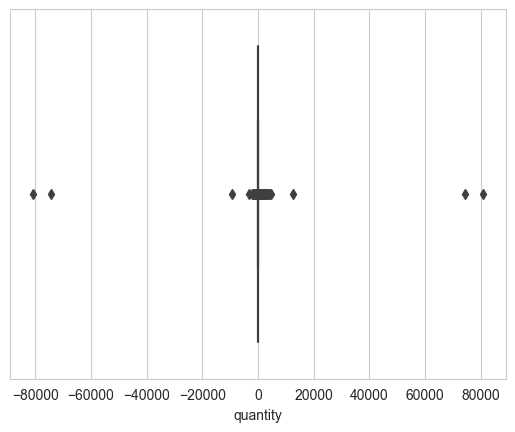

In [11]:
sns.boxplot(df, x = 'quantity')

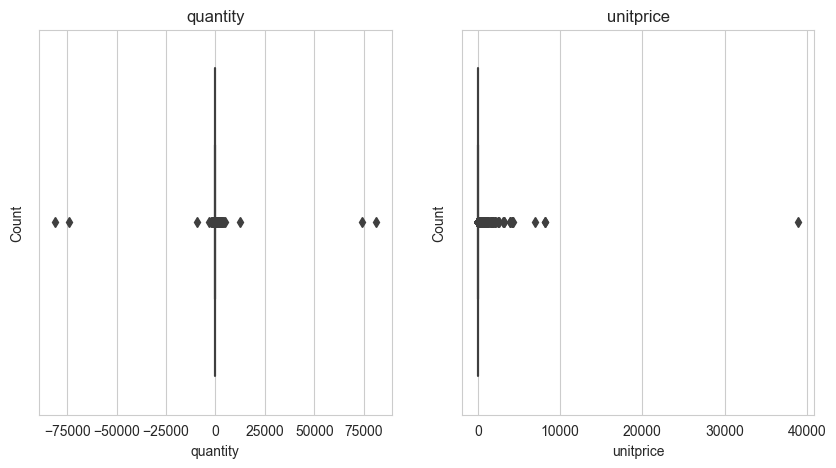

In [12]:
# Check data accuracy
features = ['quantity','unitprice']
fig = plt.figure(figsize = (10,5))

for i,j in enumerate(features):
    ax = fig.add_subplot(1,2,i+1)
    ax = sns.boxplot(df , x = j)
    ax.set_title(j)
    ax.set_ylabel('Count')

In [13]:
# Filter data that has quantity more than 0
df = df[df['quantity'] > 0]

In [14]:
# Calculate Metrics
## Total spent(Monetary)
df['monetary'] = df['quantity'] * df['unitprice']

In [15]:
# Calulate Recency
## change data type in invoicedate
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
#compute the most recent date in dataframe
max_date = max(df['invoicedate'])
# Calculate recency
df['recency'] = max_date - df['invoicedate']
df['recency'] = df['recency'].dt.days

In [16]:
# Calculate Frequency
frequency = df.groupby('customerid')['invoiceno'].nunique()
df = df.merge(frequency , on = 'customerid')
df.rename(columns = {'invoiceno_x':'invoiceno','invoiceno_y':'frequency'}, inplace = True)

In [17]:
# Create RFM dataframe
df_RFM = df.groupby('customerid' , as_index = False).agg({'monetary':'sum' , 'recency' : 'min' , 'frequency' : 'max'})
df_RFM = df_RFM[['customerid','recency','frequency','monetary']]
df_RFM

customerid  recency  frequency  monetary
0        12346.0      326          1  77183.60
1        12347.0       40          7   4310.00
2        12348.0       76          4   1797.24
3        12349.0       19          1   1757.55
4        12350.0      311          1    334.40
...          ...      ...        ...       ...
4334     18280.0      160          1    180.60
4335     18281.0        4          1     80.82
4336     18282.0      216          2    178.05
4337     18283.0       10         16   2045.53
4338     18287.0        0          3   1837.28

[4339 rows x 4 columns]

# Take overall look at the data.
---

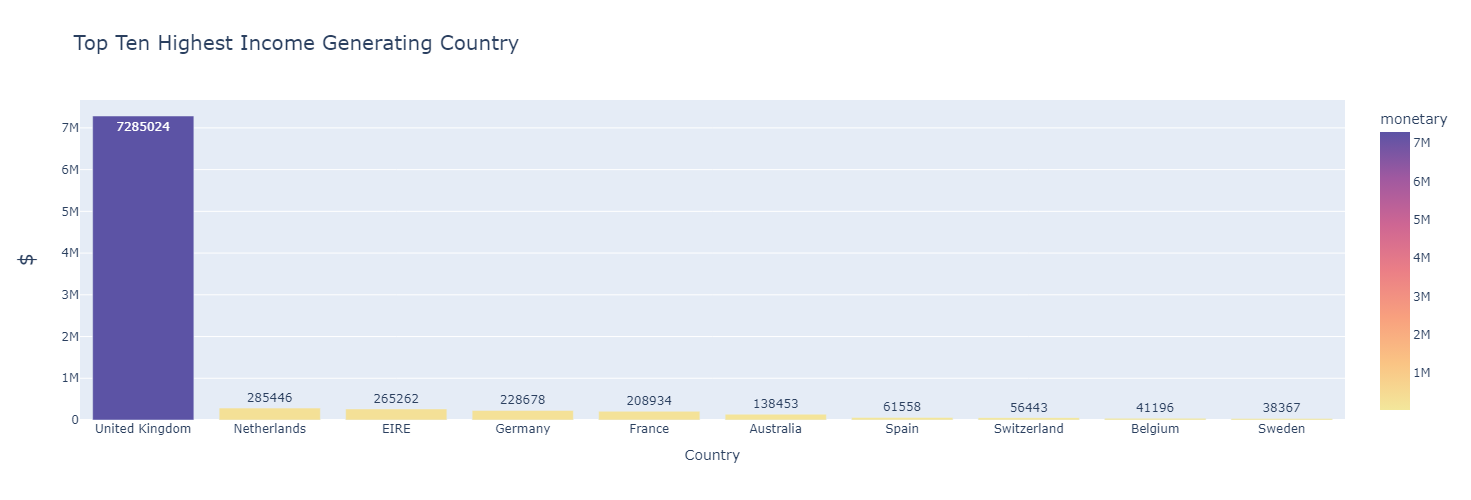

In [18]:
# Top income generating country

monetary = pd.DataFrame(df.groupby('country', as_index = False)['monetary'].sum().sort_values('monetary',ascending = False))
fig = px.bar(monetary.head(10), x = 'country' , y = 'monetary' , color = 'monetary' , title = 'Top Ten Highest Income Generating Country' , color_continuous_scale = 'sunset')
fig.update_layout(
    title={'text': "Top Ten Highest Income Generating Country", 'font': {'size': 20}},
    xaxis={'title': {'text': 'Country', 'font': {'size': 14}}},
    yaxis={'title': {'text': '$', 'font': {'size': 20}}},
    font={'size': 12},height = 500,
    width = 900)
fig.update_traces(text=monetary["monetary"].astype('int64'),
                 hovertemplate=
                  "<b>Country:</b> %{x}<br>"
                  "<b>Monetary:</b> %{y}<br>"
                  )
fig.show()

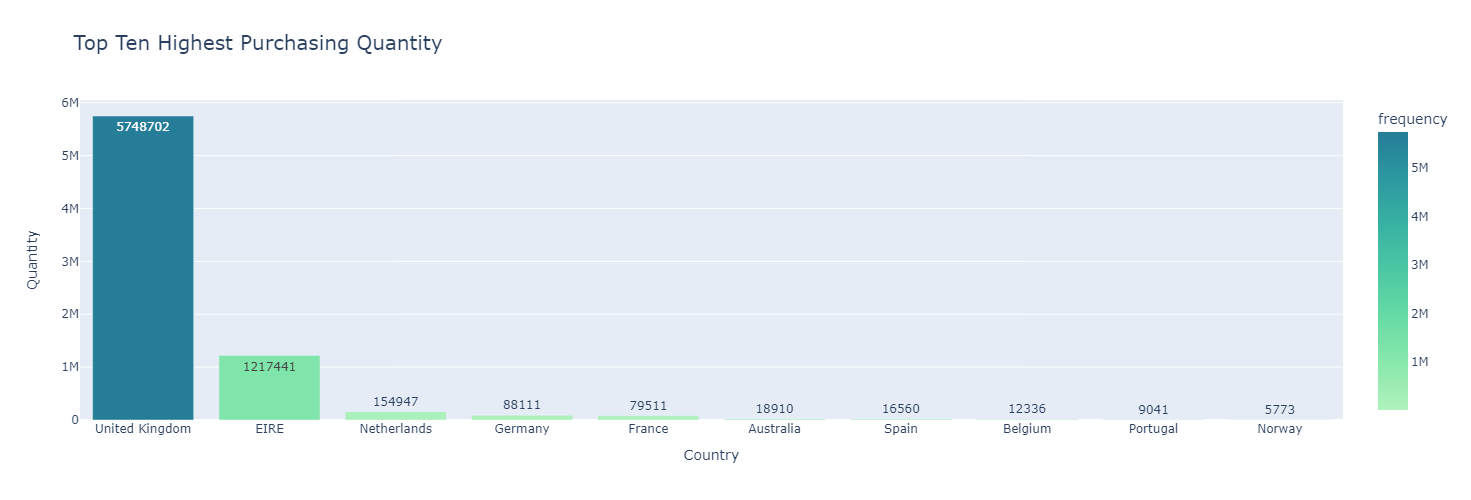

In [19]:
# Highest quantity
frequency = pd.DataFrame(df.groupby('country', as_index = False)['frequency'].sum().sort_values('frequency',ascending = False))
fig = px.bar(frequency.head(10), x = 'country' , y = 'frequency' , color = 'frequency' , title = 'Top Ten Highest Purchasing Quantity', color_continuous_scale = 'tealgrn')
fig.update_layout(
    title={'text': "Top Ten Highest Purchasing Quantity", 'font': {'size': 20}},
    xaxis={'title': {'text': 'Country', 'font': {'size': 14}}},
    yaxis={'title': {'text': 'Quantity', 'font': {'size': 14}}},
    font={'size': 12},height = 500,
    width = 900)
fig.update_traces(text=frequency["frequency"].astype('int64'),
                 hovertemplate=
                  "<b>Country:</b> %{x}<br>"
                  "<b>Frequancy:</b> %{y}<br>"
                  )
fig.show()

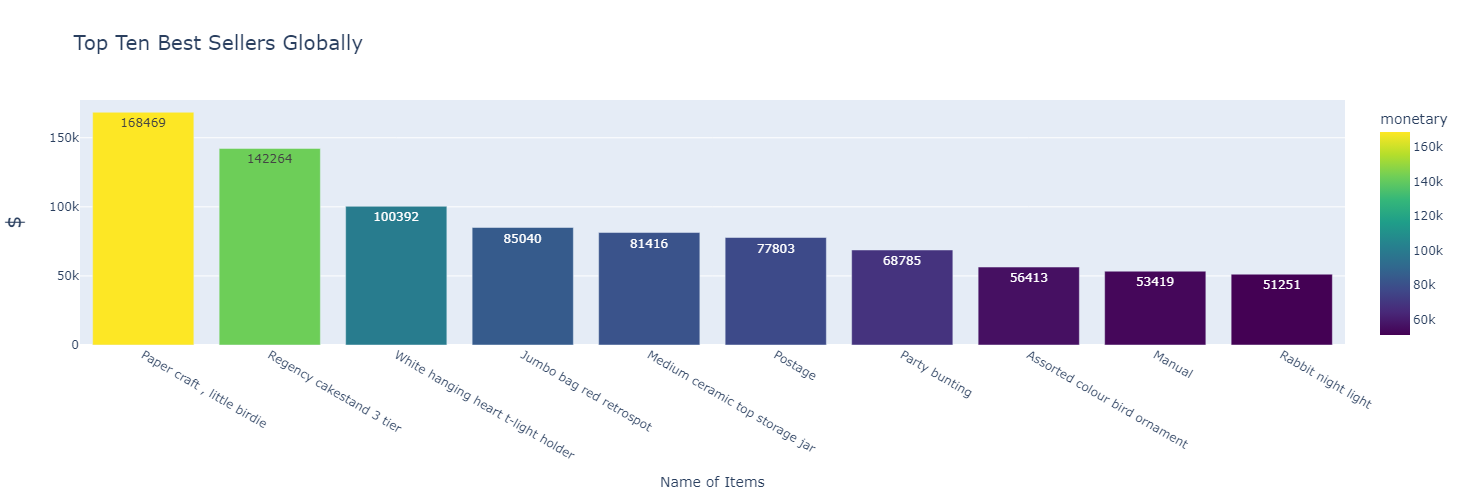

In [20]:
# Top best sellers globally
product = df.groupby('description',as_index = False).agg({'quantity':'sum' , 'monetary' : 'sum'}).sort_values('monetary', ascending = False).head(10)
product['description'] = product['description'].apply(lambda x : x.capitalize())
product = product.reset_index(drop = True)
fig = px.bar(product, x = 'description' , y = 'monetary' , color = 'monetary' , title = 'Top Ten Best Sellers Globally', color_continuous_scale = 'viridis' , custom_data = ['quantity'])
fig.update_layout(
    title={'text': "Top Ten Best Sellers Globally", 'font': {'size': 20}},
    xaxis={'title': {'text': 'Name of Items', 'font': {'size': 14}}},
    yaxis={'title': {'text': '$', 'font': {'size': 20}}},
    font={'size': 12},height = 500,
    width = 900)
fig.update_traces(text=product["monetary"].astype('int64'),
                 hovertemplate=
                  "<b>Description:</b> %{x}<br>"
                  "<b>Monetary:</b> %{y}<br>"
                  "<b>Quantity:</b> %{customdata[0]}<br>")
fig.show()

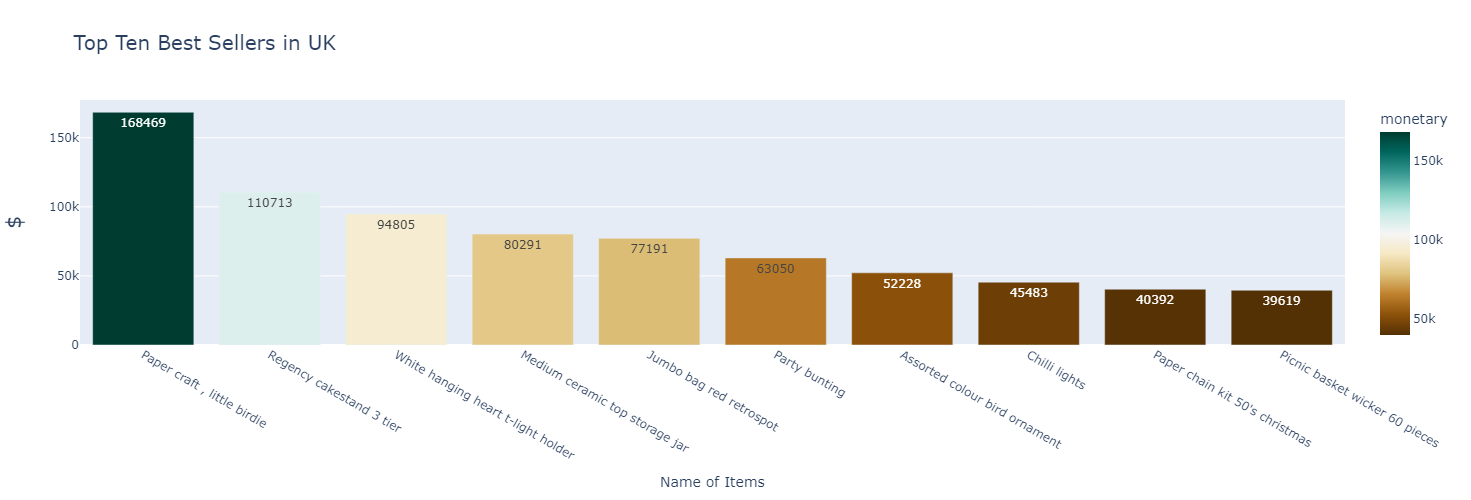

In [21]:
# UK Best sellers
uk = df[df['country'] == 'United Kingdom'].groupby('description',as_index = False).agg({'quantity':'sum' , 'monetary' : 'sum'}).sort_values('monetary', ascending = False).head(10)
uk['description'] = uk['description'].apply(lambda x : x.capitalize())
uk = uk.reset_index(drop = True)
fig = px.bar(uk, x = 'description' , y = 'monetary' , color = 'monetary' , title = 'Top Ten Best Sellers in UK', color_continuous_scale = 'brbg', custom_data= ['quantity'])
fig.update_layout(
    title={'text': "Top Ten Best Sellers in UK", 'font': {'size': 20}},
    xaxis={'title': {'text': 'Name of Items', 'font': {'size': 14}}},
    yaxis={'title': {'text': '$', 'font': {'size': 20}}},
    font={'size': 12},
    height = 500,
    width = 900)
fig.update_traces(text=uk["monetary"].astype('int64'),
                 hovertemplate=
                  "<b>Description:</b> %{x}<br>"
                  "<b>Monetary:</b> %{y}<br>"
                  "<b>Quantity:</b> %{customdata[0]}<br>"
                  )
fig.show()

# Data preprocessing for clustering analysis
---

In [22]:
# Drop the column, customerid 
df_RFM1 = df_RFM.copy()
df_RFM1

customerid  recency  frequency  monetary
0        12346.0      326          1  77183.60
1        12347.0       40          7   4310.00
2        12348.0       76          4   1797.24
3        12349.0       19          1   1757.55
4        12350.0      311          1    334.40
...          ...      ...        ...       ...
4334     18280.0      160          1    180.60
4335     18281.0        4          1     80.82
4336     18282.0      216          2    178.05
4337     18283.0       10         16   2045.53
4338     18287.0        0          3   1837.28

[4339 rows x 4 columns]

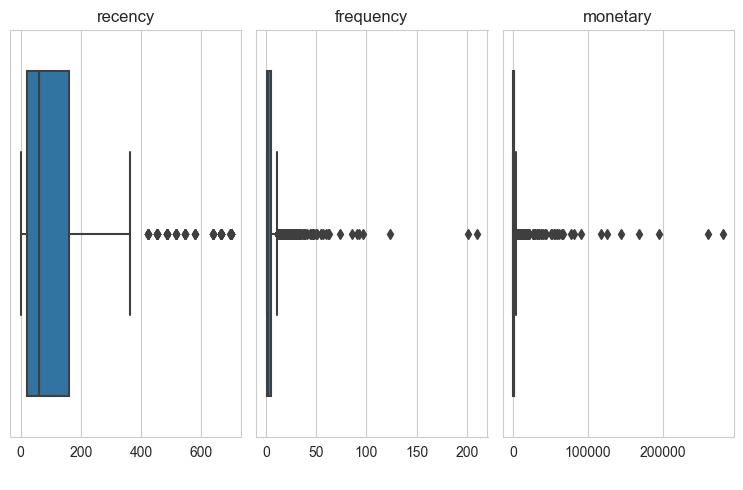

In [23]:
# Detect outliers
fig = plt.figure(figsize = (10,5))
for i,j in enumerate(df_RFM1[['recency','frequency','monetary']]):
    ax = fig.add_subplot(1,4,i+1)
    ax = sns.boxplot(df_RFM1, x = j)
    ax.set_title(j)
    ax.set_xlabel(' ')
plt.tight_layout()    

- It seems we need to remove outliers before we proceed.

In [24]:
clean_list = ['recency','frequency','monetary']
for x in clean_list:
    mean = np.mean(df_RFM1[x])
    std = np.std(df_RFM1[x])
    upper_outlier = [i for i in df_RFM1[x] if i > mean+3*std]
    lower_outlier = [i for i in df_RFM1[x] if i < mean-3*std]
    outlier = upper_outlier + lower_outlier
    df_RFM1 = df_RFM1[~df_RFM1[x].isin(outlier)]

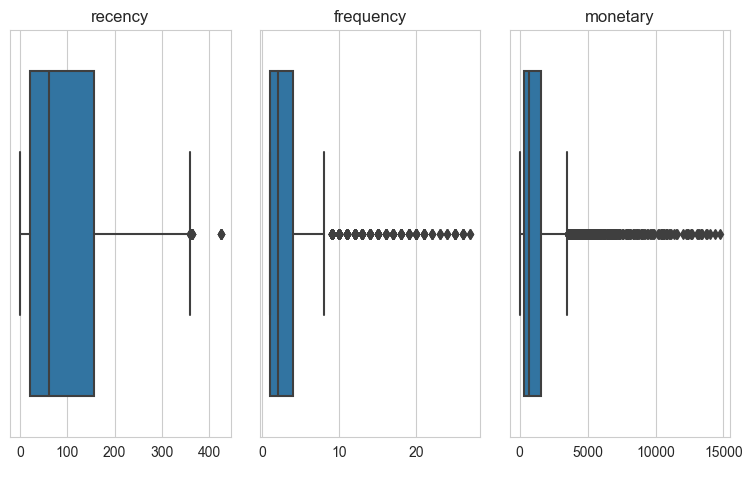

In [25]:
# Detect outliers
fig = plt.figure(figsize = (10,5))
for i,j in enumerate(df_RFM1[['recency','frequency','monetary']]):
    ax = fig.add_subplot(1,4,i+1)
    ax = sns.boxplot(df_RFM1, x = j)
    ax.set_title(j)
    ax.set_xlabel(' ')
plt.tight_layout()    

In [26]:
# Make copy
df_RFMs = df_RFM1.copy()

In [27]:
# Scale data
from sklearn.preprocessing import StandardScaler

#Import model
scaler = StandardScaler()

#Choose columns
numerical_columns = ['recency','frequency','monetary']

#Transform each column
for i in numerical_columns:
    df_RFMs[i] = scaler.fit_transform(df_RFMs[[i]])

In [28]:
df_RFMs = df_RFMs[['recency','frequency','monetary']]
df_RFMs

recency  frequency  monetary
1    -0.611415   0.864400  1.628345
2    -0.234050   0.085547  0.251924
3    -0.831544  -0.693306  0.230183
4     2.229298  -0.693306 -0.549379
5    -0.265497   1.124018  0.640185
...        ...        ...       ...
4334  0.646466  -0.693306 -0.633627
4335 -0.988779  -0.693306 -0.688284
4336  1.233477  -0.433688 -0.635024
4337 -0.925885   3.200959  0.387930
4338 -1.030708  -0.174070  0.273857

[4188 rows x 3 columns]

# Segmentation by K-Mean Clustering Algorithm
---

## Find the optimal number of clusters

### Elbow Method

In [29]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    #Instantiate model in range k
    kmeans = KMeans(n_clusters = k)
    #fit model
    kmeans.fit(df_RFMs)
    #append the SSE in k cluster to the list
    inertia.append(kmeans.inertia_)

In [30]:
# Find the elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 3 clusters


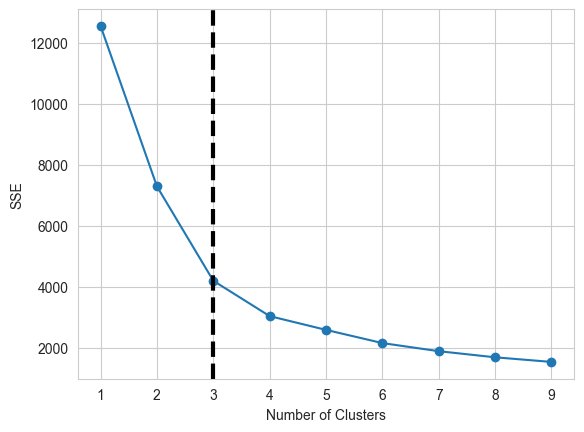

In [31]:
#Plot the graph
plt.plot(num_clusters , inertia , 'o-')    
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot vertical line at the elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

- The elbow method suggests 3 clusters.

### Silhouettte Method

In [32]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Find the average silhouette score
silhouette_average = []

for k in list(range(2,11)):
    #Create model in k clusters
    model = KMeans(n_clusters = k)
    model.fit(df_RFMs)
    cluster_labels = model.labels_
    #Compute silhouette score in eacg cluster
    score = silhouette_score(df_RFMs , cluster_labels).round(3)
    #Append score to the list
    silhouette_average.append([score , k])
    
print(silhouette_average)

[[0.54, 2], [0.486, 3], [0.464, 4], [0.421, 5], [0.403, 6], [0.409, 7], [0.377, 8], [0.378, 9], [0.343, 10]]


In [33]:
def silhouette_plot(X , from_k , to_k):
    silhouette_scores = []
    for k in range(from_k , to_k):
        #Instantiate model in k clusters
        model = KMeans(n_clusters = k)
        #Instantiate Visualizer model of with k clusters
        visualizer = SilhouetteVisualizer(model)
        #Fit data to the model
        visualizer.fit(X)
        #Draw data
        visualizer.poof()
        #Append score
        silhouette_scores.append([visualizer.silhouette_score_ , k])
    return silhouette_scores 

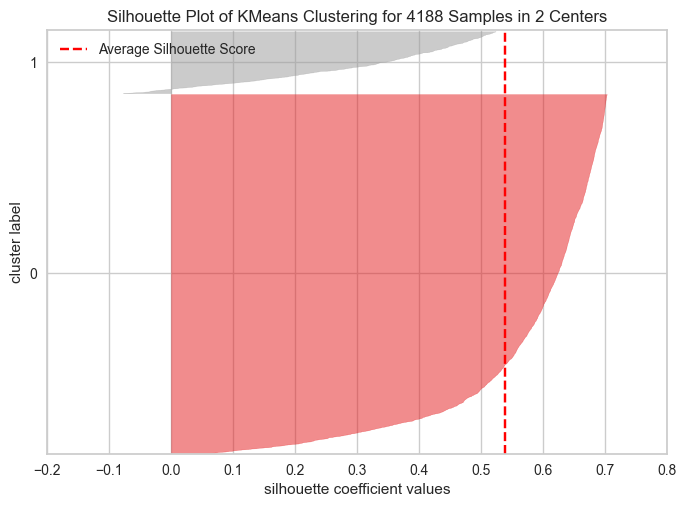

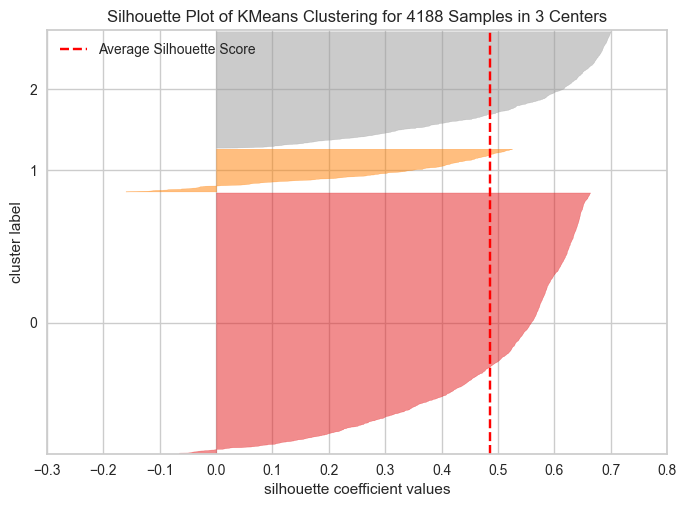

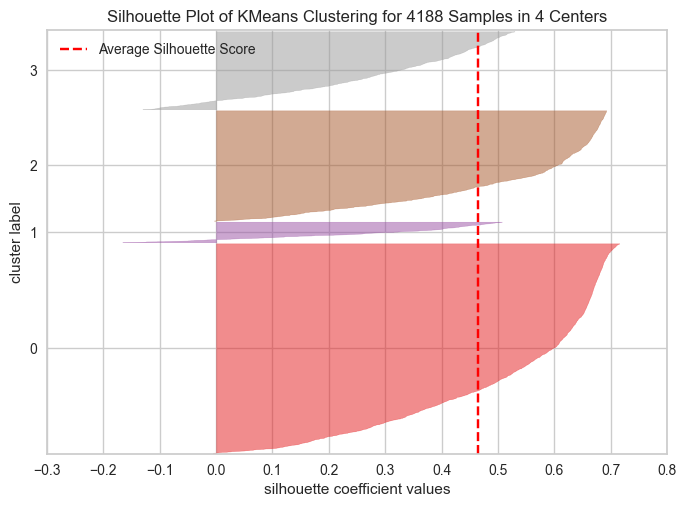

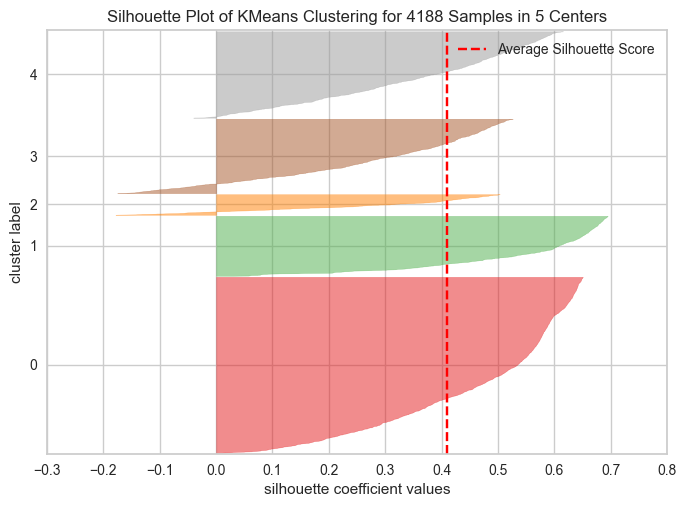

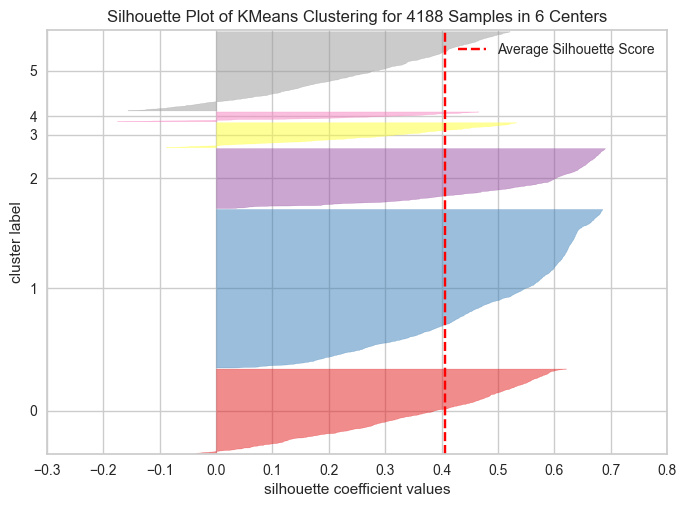

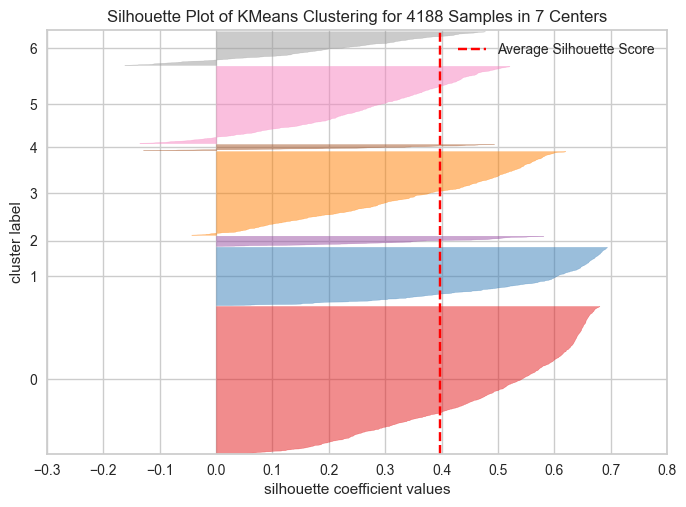

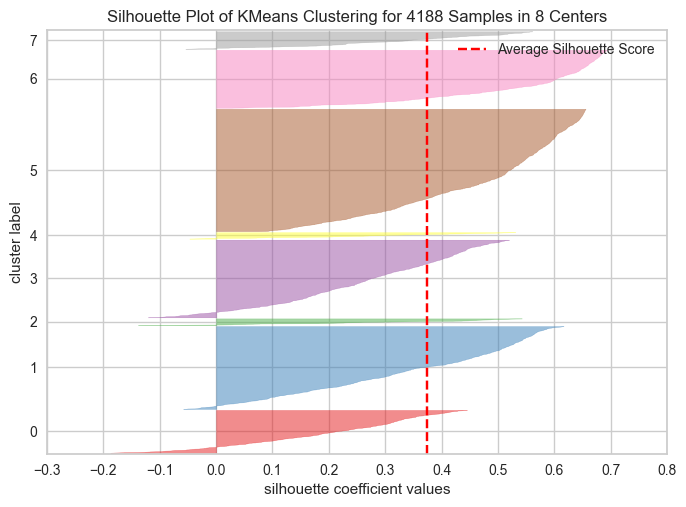

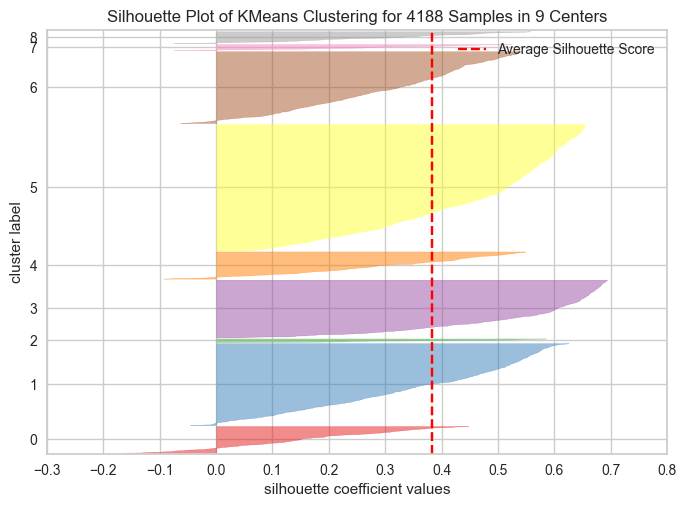

[[0.5392156685232673, 2],
 [0.48626299096800074, 3],
 [0.46382595444738167, 4],
 [0.4099261201302007, 5],
 [0.40638590012254, 6],
 [0.39643243086901364, 7],
 [0.3741629635731728, 8],
 [0.38213017402711685, 9]]

In [34]:
silhouette_plot(df_RFMs , 2 , 10)

- Although the highest average score is in two clusters, the shape of three clusters looks promising too.

- So, we will try both 2 and 3 clusters.

## Visualize K-Means Model

### K-Means clustering with 2 Clusters

In [35]:
# Try 2 cluster
model = KMeans(n_clusters = 2)
model.fit(df_RFMs)

KMeans(n_clusters=2)

In [36]:
model.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
#assign cluster in unscaled data set
df_RFM1['cluster'] = model.labels_
# +1 cluster
df_RFM1['cluster'] = df_RFM1['cluster'].apply(lambda x : x+1)

In [38]:
fig = px.scatter_3d(df_RFM1, x='recency', y='frequency', z='monetary',
              color='cluster')
fig.show()

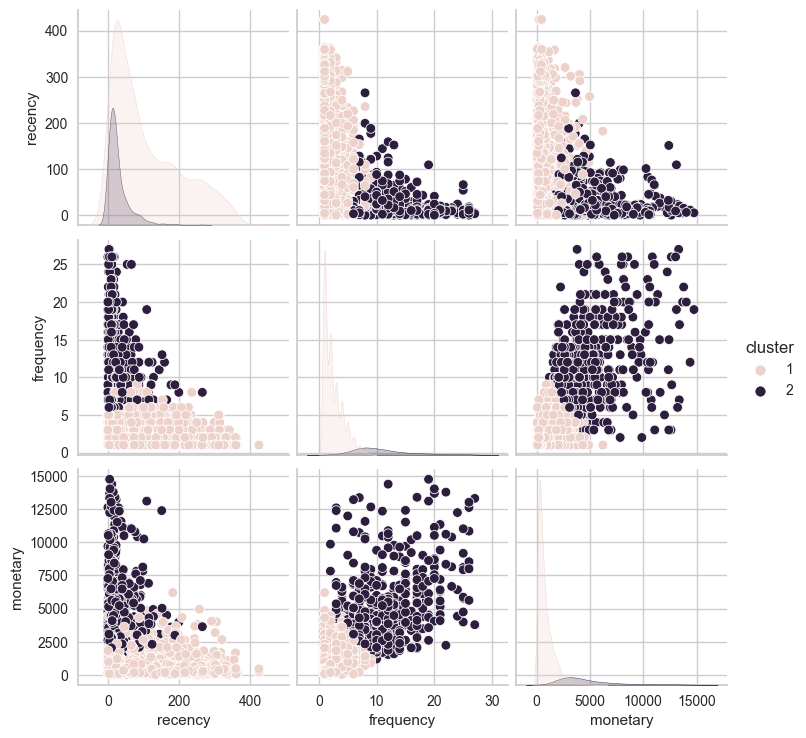

In [39]:
sns.pairplot(df_RFM1[['recency','frequency','monetary','cluster']],hue = 'cluster')

Text(0.5, 1.0, 'Heat map of Median in each cluster')

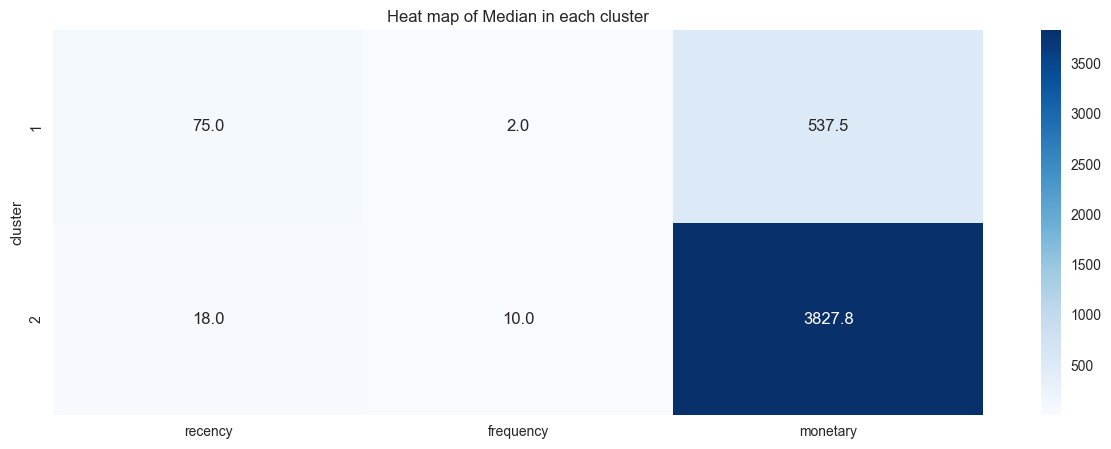

In [40]:
median = df_RFM1.groupby('cluster')['recency','frequency','monetary'].median()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )
plt.title('Heat map of Median in each cluster')

Text(0.5, 1.0, 'Number of members in each cluster')

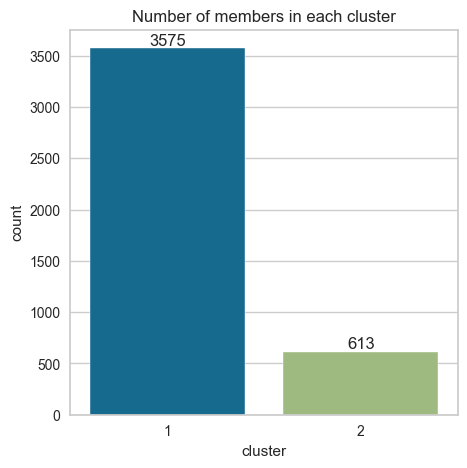

In [41]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df_RFM1, x = 'cluster')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Number of members in each cluster')

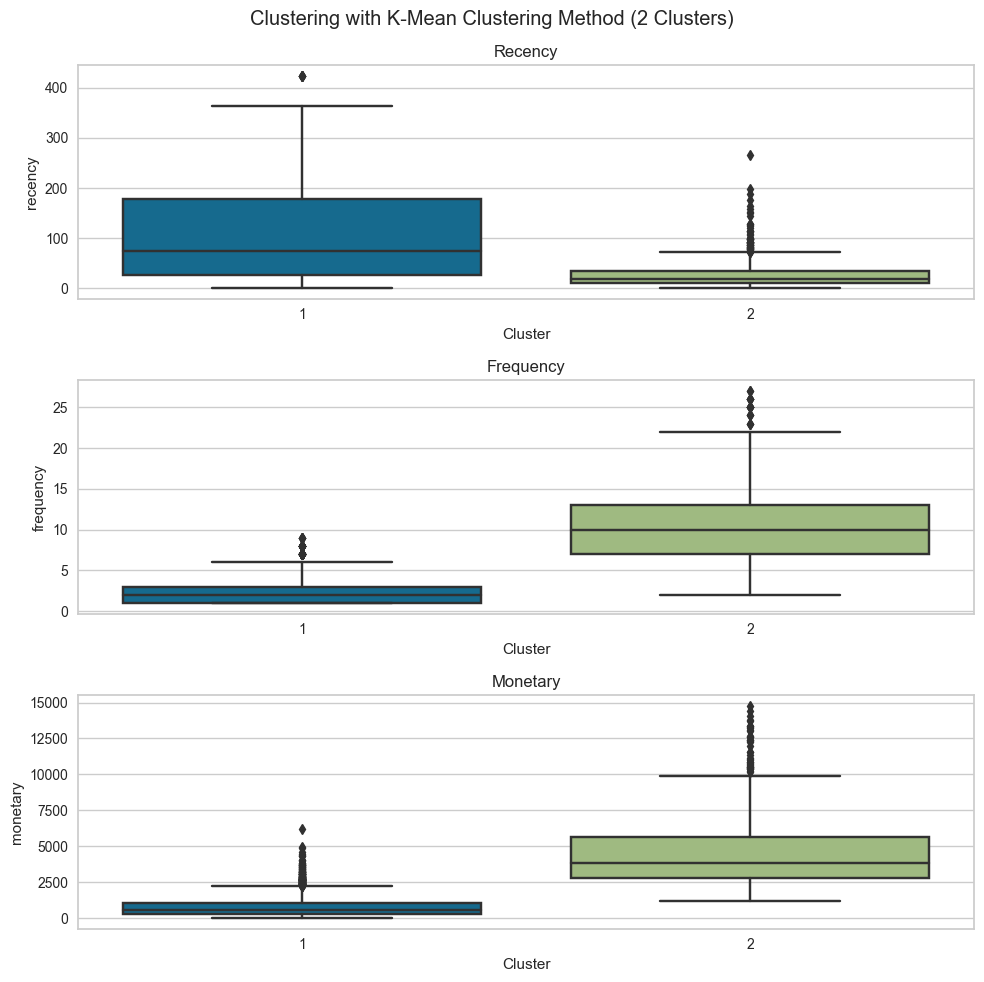

In [42]:
fig = plt.figure(figsize = (10,10))
plt.suptitle('Clustering with K-Mean Clustering Method (2 Clusters)')  
for i,j in enumerate(numerical_columns):
    ax = fig.add_subplot(3,1,i+1)
    ax = sns.boxplot(data = df_RFM1 , x = 'cluster' , y = j)
    ax.set_title('{}'.format(j.capitalize()))
    ax.set_xlabel('Cluster')
plt.tight_layout()    

### K-Mean Clustering with 3 Clusters

In [43]:
# Try 3 cluster
model = KMeans(n_clusters = 3)
model.fit(df_RFMs)

KMeans(n_clusters=3)

In [44]:
model.labels_

array([0, 2, 2, ..., 1, 0, 2])

In [45]:
centers = model.cluster_centers_

In [46]:
inversed = scaler.inverse_transform(centers)
inversed

array([[  -6.91683771, 5500.45222402, 5473.9758548 ],
       [3918.96795024,  322.49538959,  486.92473408],
       [ 403.95005214, 1107.0876151 , 1037.92197884]])

In [47]:
#assign cluster in data set
df_RFM1['cluster'] = model.labels_
# +1 cluster
df_RFM1['cluster'] = df_RFM1['cluster'].apply(lambda x : x+1)

In [48]:
fig = px.scatter_3d(df_RFM1, x='recency', y='frequency', z='monetary',
              color='cluster')
fig.show()

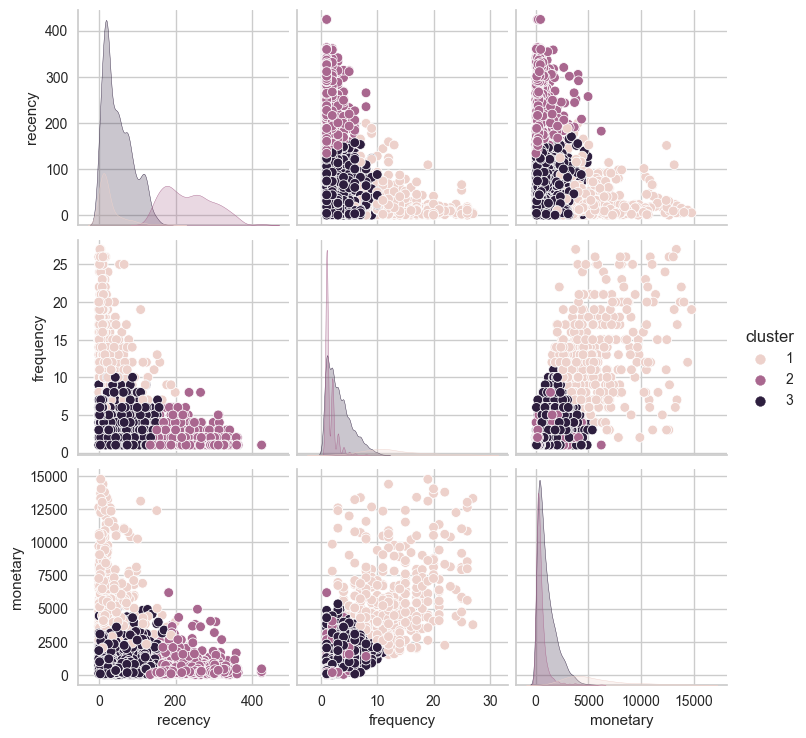

In [49]:
sns.pairplot(df_RFM1[['recency','frequency','monetary','cluster']],hue = 'cluster')

Text(0.5, 1.0, 'Heat map of Median in each cluster')

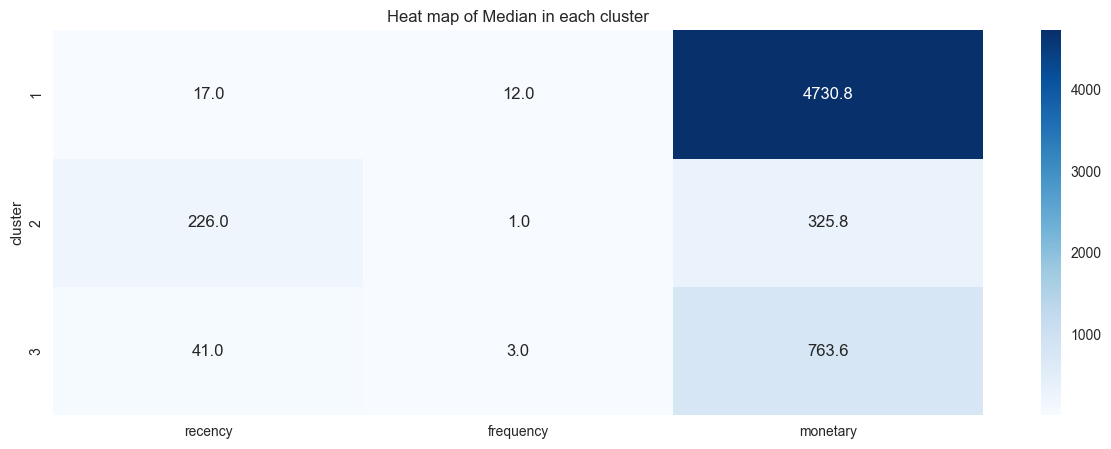

In [50]:
median = df_RFM1.groupby('cluster')['recency','frequency','monetary'].median()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )
plt.title('Heat map of Median in each cluster')

Text(0.5, 1.0, 'Number of members in each cluster')

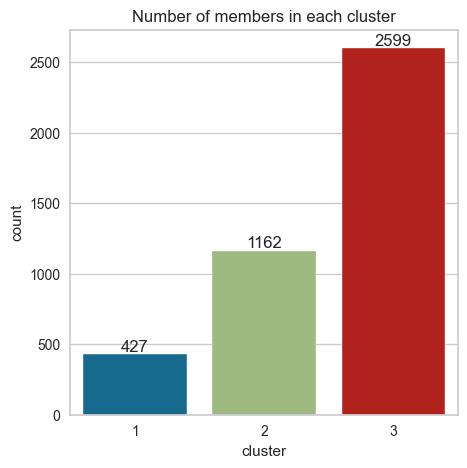

In [51]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df_RFM1, x = 'cluster')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Number of members in each cluster')

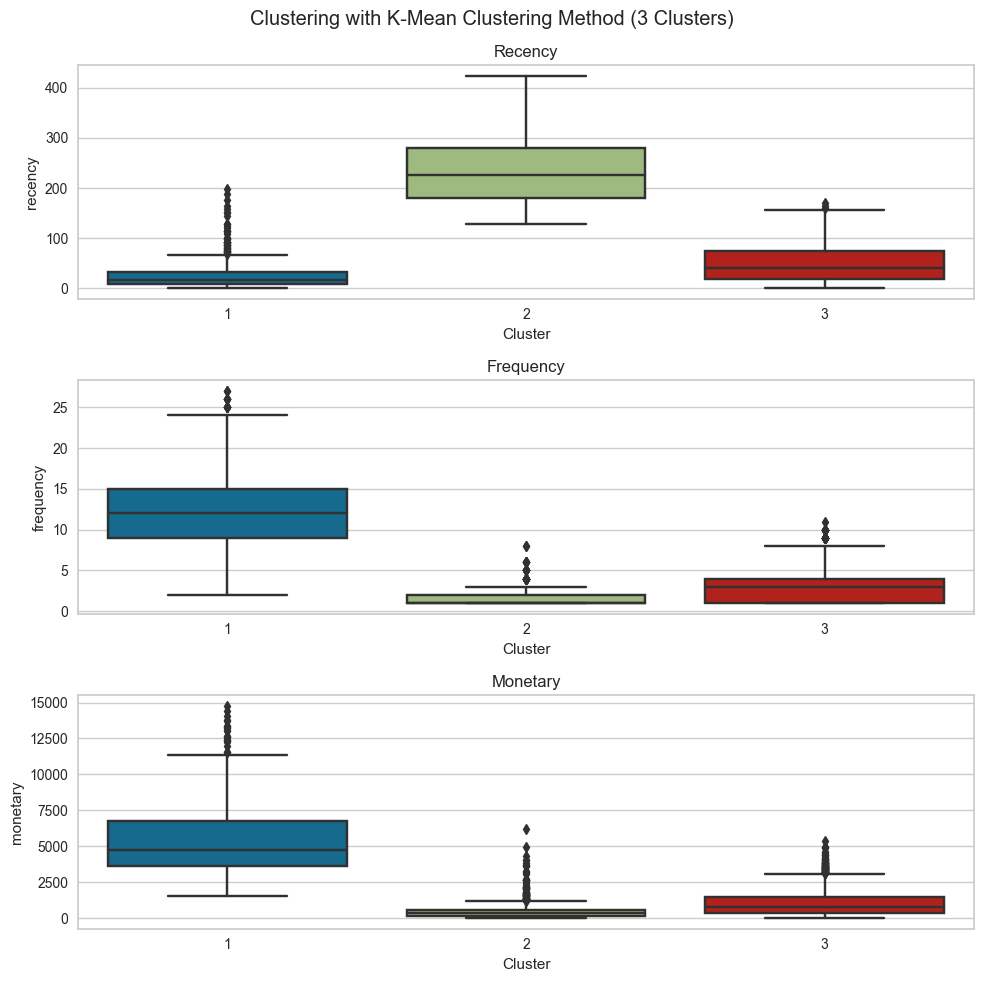

In [52]:
fig = plt.figure(figsize = (10,10))
plt.suptitle('Clustering with K-Mean Clustering Method (3 Clusters)')  
for i,j in enumerate(numerical_columns):
    ax = fig.add_subplot(3,1,i+1)
    ax = sns.boxplot(data = df_RFM1 , x = 'cluster' , y = j)
    ax.set_title('{}'.format(j.capitalize()))
    ax.set_xlabel('Cluster')
plt.tight_layout()    

# Hiearchichal Clustering
---

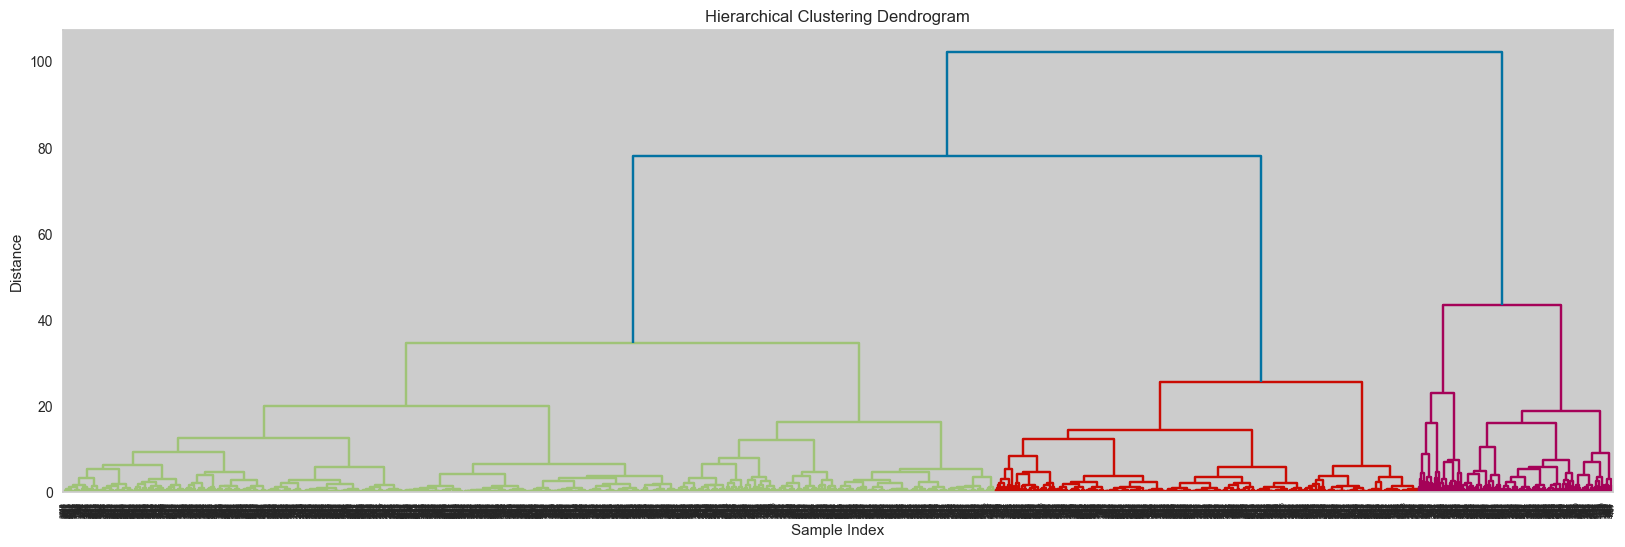

In [53]:
# Building based on Ward's minimum variance method
from scipy.cluster.hierarchy import dendrogram, linkage

# Select RFM features for clustering
rfm_features = df_RFMs[['recency', 'frequency', 'monetary']]

# Perform hierarchical clustering
linked = linkage(rfm_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

- According to the dendogram, we will built the model with 3 clusters.

In [54]:
from scipy.cluster.hierarchy import cut_tree
# 3 clusters
cluster_labels = cut_tree(linked , n_clusters=3).reshape(-1)
cluster_labels

array([0, 1, 1, ..., 2, 0, 1])

In [55]:
# Label data
df_RFM1['cluster'] = cluster_labels
df_RFM1['cluster'] = df_RFM1['cluster'].apply(lambda x : x+1)

Text(0.5, 1.0, 'Heat map of Median in each cluster')

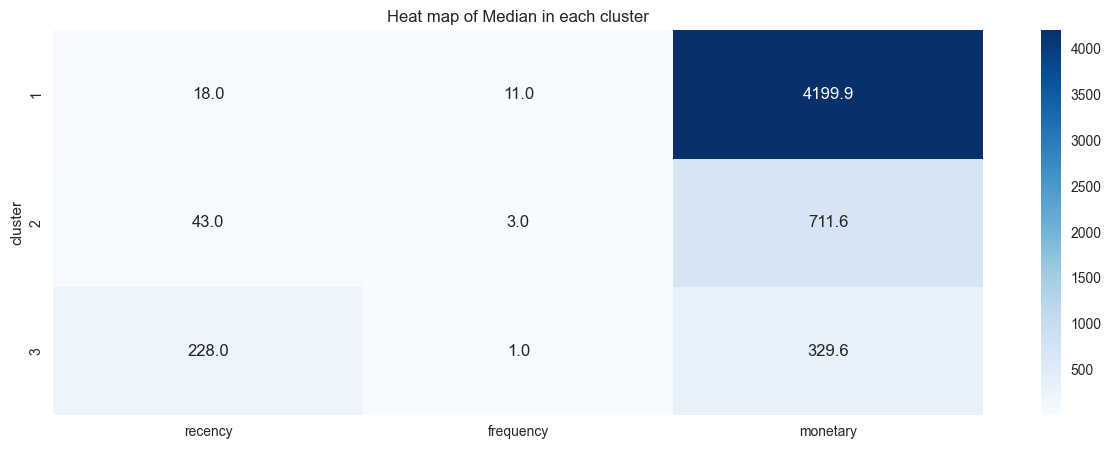

In [56]:
median = df_RFM1.groupby('cluster')['recency','frequency','monetary'].median()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )
plt.title('Heat map of Median in each cluster')

Text(0.5, 1.0, 'Number of members in each cluster')

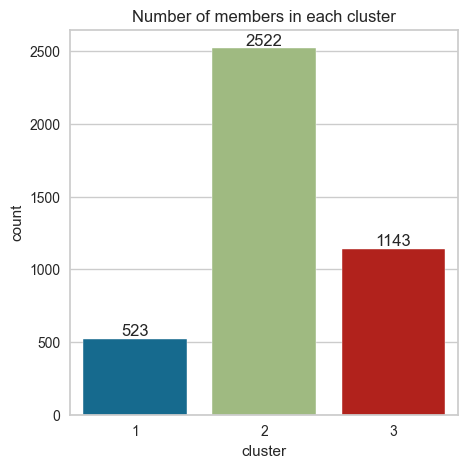

In [57]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(df_RFM1, x = 'cluster')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Number of members in each cluster')

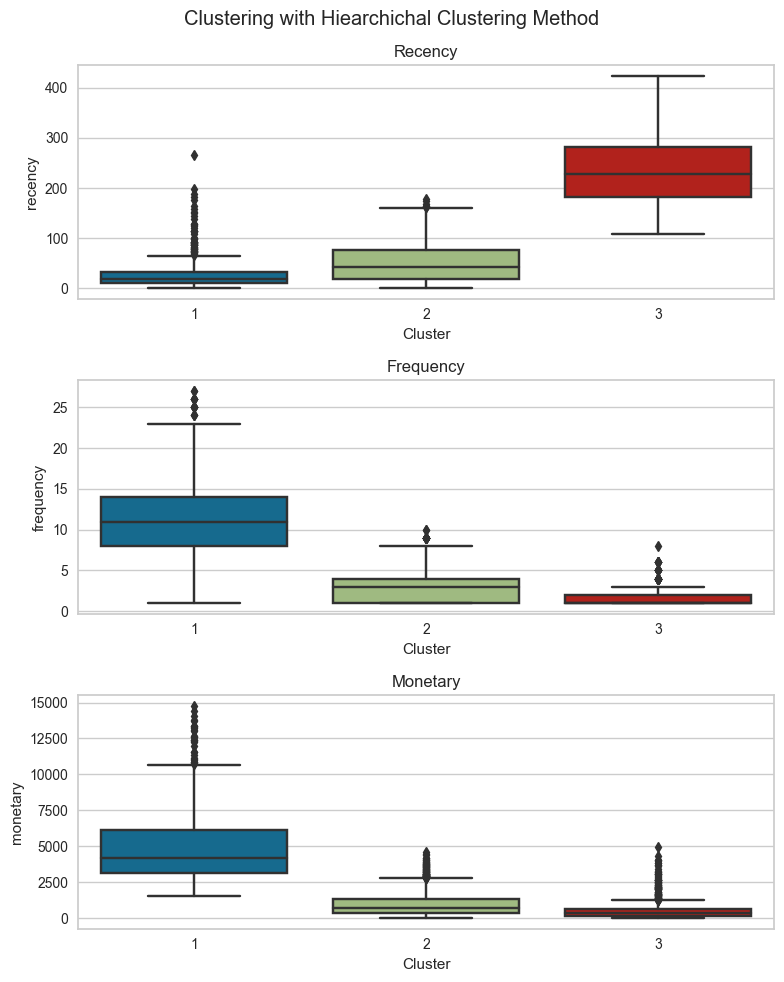

In [58]:
fig = plt.figure(figsize = (8,10))
plt.suptitle('Clustering with Hiearchichal Clustering Method')    
for i,j in enumerate(numerical_columns):
    ax = fig.add_subplot(3,1,i+1)
    ax = sns.boxplot(data = df_RFM1 , x = 'cluster' , y = j)
    ax.set_title('{}'.format(j.capitalize()))
    ax.set_xlabel('Cluster')
plt.tight_layout()    

# Conclusion

- After we try both K-mean clustering and Hiearchichal clustering method, it seems that three clusters are the optimal number for customer segmentaion.
- The characteristics in each cluster in both methods are quite similiar. So, this section will intpret only the result from Hiearchichal clustering method.

**According to the result from hiearchichal clustering method , we can divide customers into three groups:**
1. The first group is characterized by customer who has high-spending power (4,199.9 USD), bought items on average last 18 days from the most recent transaction date , and purchased items on average 11 times.
2. The second group is characterized by customer who has average-spending power (711.6 USD) , bought items on average last 43 days from the most recent transaction date , and purchased items on average 3 times.
3. The third group is characterized by customer who has low-spending power (329.6 USD) , bought items on average last 228 days from the most recent transaction date , and purchased items on average 1 times.

***The figures below demonstrate the proportion of customers in each cluster and how much they generate income.***

- It seems that the cluster with the lowest members, cluster 1 , generated the highest amount of income.
- Although, the different between the spending power in cluster 1 and 2 is huge, the amount of income generated by cluster 2 is almost equal to the cluster 1 (42.5% and 46.8%) due to the high amount of members in cluster 2.
- Cluster 3 generated only 10% of the total income.
- Therefore, the marketing team should be focusing on mainly customer in cluster 1 and 2.

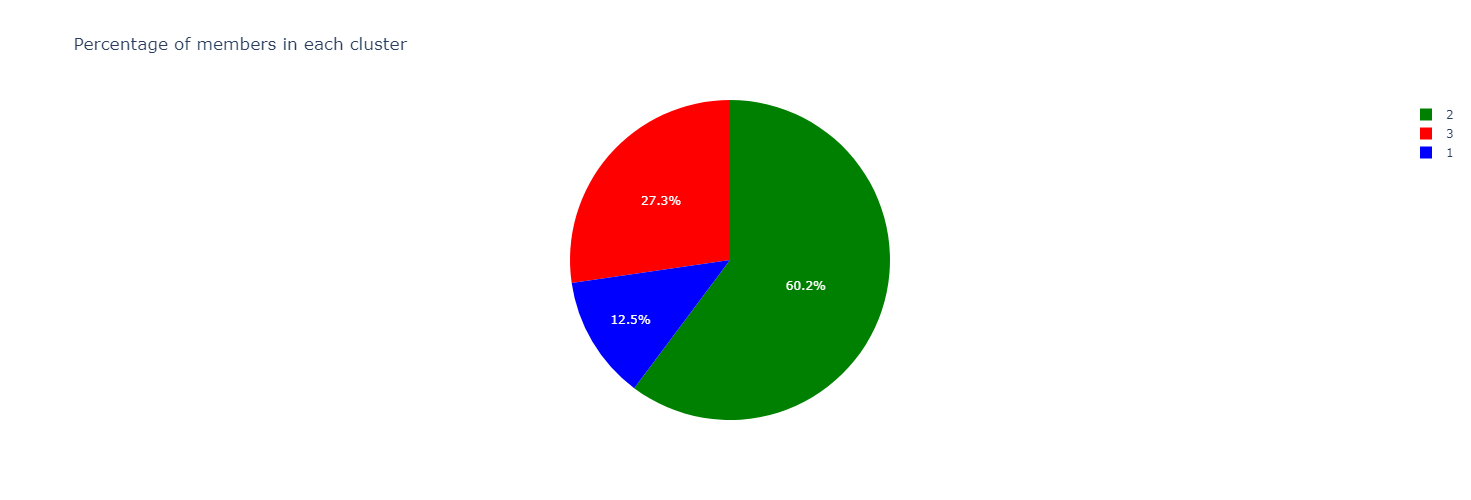

In [72]:
pies = df_RFM1.groupby('cluster').count().reset_index()
fig = px.pie(data_frame = pies ,names = 'cluster', values = 'customerid', color_discrete_sequence = ['green','red','blue'], title = 'Percentage of members in each cluster')
fig.update_layout(height = 500,
                 width = 500)

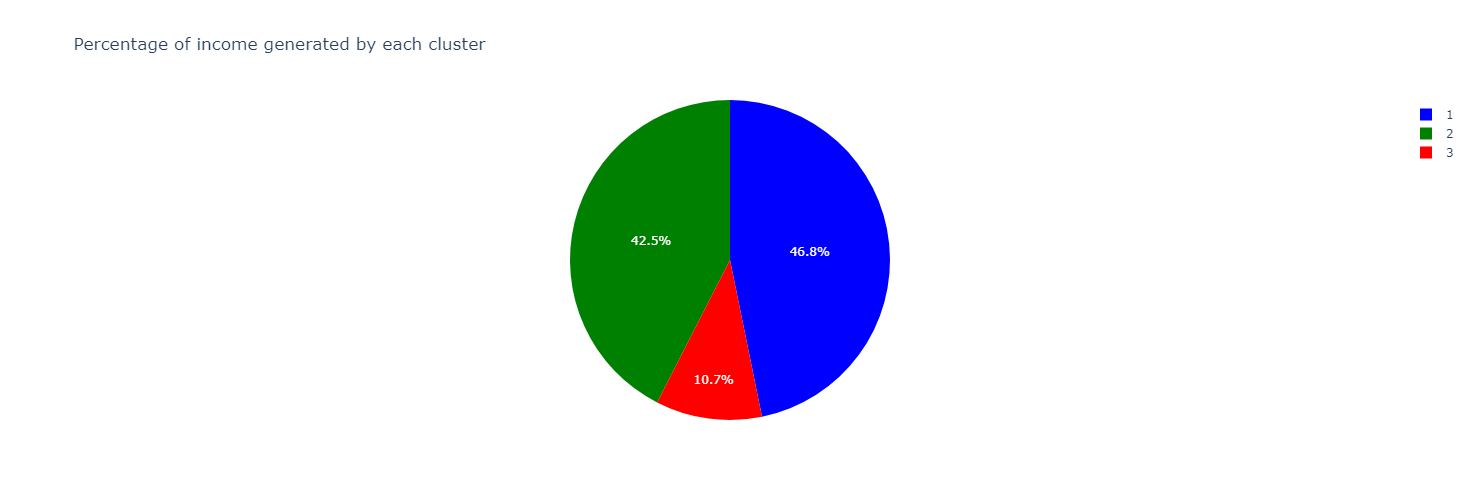

In [73]:
summary = df_RFM1.groupby('cluster',as_index = False)['frequency','monetary'].sum()
fig = px.pie(summary , names = 'cluster' , values = 'monetary' , color_discrete_sequence = ['blue','green','red'], title = 'Percentage of income generated by each cluster'  )
fig.update_layout(height = 500,
                 width = 500)